In [1]:
import sympy
from sympy import Eq, latex, plot_implicit, Matrix, simplify, expand, collect
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from IPython.display import Latex

# Практическое занятие 12
# Компьютерный практикум по алгебре на Python
## Квадратичные формы
Квадратичной формой нескольких переменных $x_1,x_2,...,x_n$ называют однородный многочлен второй степени
$$
\sum_{i,j=1}^na_{ij}x_ix_j=\sum_{i=1}^na_{ii}x_i^2+2\sum_{i=1}^n\sum_{j=i+1}^na_{ij}x_ix_j. 
$$
В частности, квадратичные формы двух и трех переменных можно записать в виде:
$$
a_{11}x^2+2a_{12}xy+a_{22}y^2,\qquad a_{11}x^2+a_{22}y^2+a_{33}z^2+2a_{12}xy+2a_{13}xz+2a_{23}yz.
$$

Удобнее записывать квадратичные формы в матричном виде:
$$
X^TAX,\quad X=\left(\begin{matrix}x\\y\end{matrix}\right),\quad A=\left(\begin{matrix}a_{11}&a_{12}\\a_{12}&a_{22}\end{matrix}\right).
$$

**Особенности матрицы квадратичной формы**

Матрица квадратичной формы всегда ***симметрична***. Внедиагональные элементы матрицы квадратичной формы равны половине коэффициента произведения переменных $x_ix_j$, $i\neq j$.

При переходе к новому базису матрица квадратичной формы изменяется по формуле
$$
A'=P^{T}AP,
$$
где $P$ ортогональная матрица.

В **ортонормированном** базисе из ОРТОГОНАЛИЗИРОВАННЫХ и НОРМИРОВАННЫХ собственных векторов, соответствующих матрице $A$, матрица квадратичной формы имеет диагональный вид,
на диагонали собственные значения.

Уточнение: если есть кратные собственные числа, то соответствующие такому собственному числу собственные векторы могут не быть ортогональны, в этом случае для построения ортогональной матрицы перехода нужно проводить ортогонализацию. 

Такой вид квадратичной формы, в котором матрица диагональная, называется каноническим видом квадратичной формы. Приведение квадратичной формы к каноническому виду позволяет определить тип кривой или поверхности второго порядка. Канонический вид определен неоднозначно, т.е. у одной и той же квадратичной формы может быть несколько канонических видов, но выполняется 

**Закон инерции квадратичной формы**

Число слагаемых с положительными (отрицательными) каноническими коэффициентами в каноническом виде квадратичной формы не зависит от способа приведения квадратичной формы к каноническому виду.

### Пример 1.

Построить матрицу квадратичной формы $u=-x^2-y^2-z^2+2xy+4xz$ и привести ее к каноническому виду. Вначале построим матрицу: 
$$
A\left(\begin{matrix}-1&1&2\\1&-1&0\\2&0&-1\end{matrix}\right).
$$
Проверим, что эта матрица задает нашу квадратичную форму, для этого вычислим
$$
X^TAX-u,\quad X=\left(\begin{matrix}x\\y\\z\end{matrix}\right). 
$$

In [2]:
from sympy.abc import x, y, z
u = -x ** 2 - y ** 2 - z ** 2 + 2 * x * y + 4 * x * z
A = Matrix([[-1, 1, 2], [1, -1, 0], [2, 0, -1]])
X = Matrix([x, y, z])
res = X.T * A * X
quadr_form = simplify(expand(res[0]))
display(Latex(f'X = {latex(X)},\ X^T  A  X = {latex(quadr_form)},\ \
X^T  A  X - u = {latex(quadr_form - u)}'))

<IPython.core.display.Latex object>

Обратим внимание, что при умножении матриц $X^TAX$ получается не число, а матрица, состоящая из одного элемента!

Найдем собственные векторы матрицы $A$, нормируем их и составим из них матрицу перехода $P$:

In [3]:
ev = A.eigenvects()
P = Matrix([Matrix([vect.normalized() for vect in vects]).T for num, multipl, vects in ev]).T
display(Latex(f'P = {latex(P)}'))

<IPython.core.display.Latex object>

Найдем матрицу квадратичной формы в новом базисе:

In [4]:
A_new = P.T * A * P
display(simplify(A_new))

Matrix([
[-1,            0,            0],
[ 0, -1 + sqrt(5),            0],
[ 0,            0, -sqrt(5) - 1]])

In [5]:
display(Latex(f'Собственные\ числа\ {latex([num for num, mult, vects in ev])}'))

<IPython.core.display.Latex object>

Если матрица перехода не ортогональная, то формула для матрицы квадратичной формы в новом базисе $P^{-1}AP$.

In [6]:
P1 = Matrix([Matrix(vects).T for num, multipl, vects in ev]).T
A_new1 = P1 ** -1 * A * P1
display(Latex(f'P_1 = {latex(P1)},\ A_{{new}} = {latex(simplify(A_new1))}'))

<IPython.core.display.Latex object>

Получим квадратичную форму в виде многочлена:

In [7]:
res = simplify(expand(X.T * A_new * X))[0]
display(res)

-x**2 - y**2 + sqrt(5)*y**2 - sqrt(5)*z**2 - z**2

Сгруппируем слагаемые с помощью collect:

In [8]:
collect(res, [x, y, z])

-x**2 + y**2*(-1 + sqrt(5)) + z**2*(-sqrt(5) - 1)

Каноническая форма содержит квадраты переменных $x$ и $z$ с отрицательными коэффициентами, а квадрат $y$ - с положительным.

### Пример 2.

Привести матрицу квадратичной формы $u=-x^2-y^2-z^2+2xy+4xz$ из Примера 1 к каноническому виду методом выделения полных квадратов. Проверить выполнение Закона инерции.

**План выделения полных квадратов:**

заметим, что $y$ входит только в одно произведение разных переменных, а именно, в $2xy$, поэтому будем выделять полный квадрат так, чтобы в него вошли все слагаемые с $y$, т.е. $2xy$ и $-y^2$. До полного квадрата эти слагаемые дополняются с помощью $-x^2$, получим $-(x-y)^2$ (или $-(y-x)^2$). Делаем замену переменных $Y=y-x$, что эквивалентно $y=Y+x$:

In [9]:
from sympy.abc import Y, Z
u1 = simplify(expand(u.subs(y, Y + x)))
display(Latex(f'u = {latex(u)}, u_1 = {latex(u1)}'))

<IPython.core.display.Latex object>

Видим, что $z$ входит только в одно произведение разных переменных, а именно, в $4xz$, поэтому будем выделять полный квадрат так, чтобы в него вошли все слагаемые с $z$, т.е. $4xz$ и $-z^2$. До полного квадрата эти слагаемые дополняются с помощью $-4x^2$, получим $-(2x-z)^2$ (или $-(z-2x)^2$). Делаем замену переменных $Z=z-2x$, что эквивалентно $z=Z+2x$:

In [10]:
u2 = simplify(expand(u1.subs(z, Z + 2 * x)))
display(Latex(f'u_2 = {latex(u2)}'))

<IPython.core.display.Latex object>

Как и в примере 1, в каноническом виде два отрицательных квадрата и один положительный, Закон инерции выполняется.

## Классификация кривых второго порядка

Все кривые второго порядка на плоскости описываются уравнением вида
$$
a_{11}x^2+2a_{12}xy+a_{22}y^2+2a_1x+2a_2y+a_0=0\qquad(1)
$$

Невырожденные кривые второго порядка - эллипс, гипербола и парабола.

Для классификации кривых нужно привести уравнение (1) к каноническому виду.

Пусть $a_{12}\neq0$.

Вначале приведем к каноническому виду квадратичную форму из уравнения (1), в качестве матрицы перехода к новому базису можно использовать матрицу поворота на угол $\alpha$:
$$
\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right)
$$
угол $\alpha$ находится из условия 
$$
{\rm ctg}(2\alpha)=\frac{a_{11}-a_{22}}{2a_{12}}
$$

В результате получаем уравнение вида (1), но с нулевым коэффициентом при $xy$.

Рассмотрим разные случаи:

1) если $a_{11}\neq0$, $a_{22}\neq0$, то от слагаемых $a_1x$ и $a_2y$ можно избавиться переносом начала координат, соответствующая замена переменных 
$$
x=x'-\frac{a_1}{a_{11}},\quad y=y'-\frac{a_2}{a_{22}}\qquad(2)
$$

После такой замены уравнение кривой примет вид
$$
a_{11}x^2+a_{22}y^2+a_0=0\qquad(3)
$$

Если $a_{11}a_{22}>0$, причем $a_{11} a_0<0$, то кривая - эллипс или окружность.

Если $a_{11}a_{22}<0$, причем $a_0\neq 0$, то кривая - гипербола.

Остальные варианты случая 1)  вырожденные  (прямые, точки, пустое множество).

2) если $a_{11}\neq0$, $a_{22}=0$ ($a_{11}=0$, $a_{22}\neq0$), тогда в уравнении (1) с нулевым коэффициентом при $xy$ можно избавиться от $a_1x$ ($a_2y$) переносом начала координат.

После переноса получаем каноническое уравнение параболы или вырожденный случай.
### Пример 3.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2-2xy-y^2+4x-2=0
$$
Составляем матрицу  $A3$ из коэффициентов уравнения, коэффициенты при $xy$, $x$ и $y$ делим на 2 и располагаем в симметричных относительно главной диагонила позициях. Вектор переменных состоит из трех координат, последняя координата 1, она нужна для слагаемых первого и нулевого порядков:

In [11]:
A3 = Matrix([[1, -1, 2], [-1, -1, 0], [2, 0, -2]])
X3 = Matrix([x, y, 1])
display(Latex(f'A_3 = {latex(A3)}, X_3 = {latex(X3)}'))

<IPython.core.display.Latex object>

Убедимся, что эта матрица действительно определяет наше уравнение:

In [12]:
eq3 = Eq(simplify(expand(X3.T * A3 * X3))[0], 0)
display(eq3)

Eq(x**2 - 2*x*y + 4*x - y**2 - 2, 0)

Теперь составим матрицу поворота, матрица третьего порядка, правый нижний элемент равен 1, это матрица поворота в трехмерном пространстве в плоскости XY. 

In [13]:
alpha = sympy.acot((A3[0, 0] - A3[1, 1]) / (2 * A3[0, 1])) / 2
P = Matrix([[Cos(alpha), -Sin(alpha), 0],
            [Sin(alpha), Cos(alpha), 0],
            [0, 0, 1]])
P.simplify()
display(P)

Matrix([
[ sqrt(sqrt(2) + 2)/2, sqrt(2 - sqrt(2))/2, 0],
[-sqrt(2 - sqrt(2))/2, sqrt(sqrt(2) + 2)/2, 0],
[                   0,                   0, 1]])

После поворота (уже в новых координатах $x_1$, $y_1$) наша матрица примет вид

In [14]:
A3_new = P.T * A3 * P
A3_new.simplify()
display(A3_new)

Matrix([
[          sqrt(2),                 0, sqrt(sqrt(2) + 2)],
[                0,          -sqrt(2), sqrt(2 - sqrt(2))],
[sqrt(sqrt(2) + 2), sqrt(2 - sqrt(2)),                -2]])

Запишем получившееся уравнение

In [15]:
from sympy.abc import X, Y, Z
X3 = Matrix((X, Y, 1))
simplify(expand((X3.T * A3_new * X3)[0]))

sqrt(2)*X**2 + 2*X*sqrt(sqrt(2) + 2) - sqrt(2)*Y**2 + 2*Y*sqrt(2 - sqrt(2)) - 2

Осталось перенести начало координат так, чтобы исчезли слагаемые с $X$ и $Y$. Соответствующая замена имеет вид (2):
$$
X=X'-\frac{a_1}{a_{11}},\quad Y=Y'-\frac{a_2}{a_{22}}
$$

In [16]:
X3_new = Matrix((X - A3_new[0, 2] / A3_new[0, 0],
                 Y - A3_new[1, 2] / A3_new[1, 1],
                 1))
eq3_new = simplify(expand(X3_new.T * A3_new * X3_new))[0]
display(Latex(f'X_{{3\ new}} = {latex(X3_new)},\ \
eq_{{3\ new}} = {latex(eq3_new)}'))

<IPython.core.display.Latex object>

Осталось поделить выражение на 4 и перенести свободный член в правую часть:

In [17]:
free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new / (-free) + 1
Eq(eq3_last, 1)

Eq(sqrt(2)*X**2/4 - sqrt(2)*Y**2/4, 1)

Заменим переменные $X$ и $Y$ на $x$, $y$, чтобы изобразить получившуюся гиперболу на одной координатной плоскости с графиком исходного уравнения.

In [18]:
eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
display(eq3_last_xy)

Eq(sqrt(2)*x**2/4 - sqrt(2)*y**2/4, 1)

Изобразим на графике исходную кривую и получившуюся гиперболу.

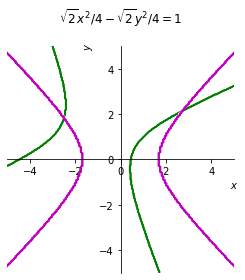

In [19]:
p = plot_implicit(eq3, line_color='g', aspect_ratio=(1, 1),
                  xlabel='$x$', ylabel='$y$', 
                   title=f'{latex(eq3_last_xy, mode="inline")}\n',
                   adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy, (x, -10, 10), line_color='m',
                       aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()